# Machine Learning Analysis
## Data Mining - Product Sales Analysis
### Preprocessing, Clustering & Regression

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from preprocessing import DataPreprocessor
from kmeans import KMeans, ElbowAnalyzer
from regression import RegressionAnalyzer
from visualization import Visualizer

## Load Data

In [17]:
df = pd.read_csv('product_sales.csv')
print(f'Dataset shape: {df.shape}')
print(f'\nFirst 5 rows:')
print(df.head())
print(f'\nData types:')
print(df.dtypes)

Dataset shape: (200, 9)

First 5 rows:
   product_id  product_name   category  price  cost  units_sold  \
0           1    Whole Milk      Dairy   3.99  2.50         450   
1           2   White Bread     Bakery   2.49  1.20         890   
2           3        Banana    Produce   0.59  0.35        1200   
3           4   Ground Beef       Meat   5.99  3.80         320   
4           5  Orange Juice  Beverages   4.49  2.30         380   

   promotion_frequency  shelf_level  profit  
0                    2            3   670.5  
1                    1            2  1148.1  
2                    0            2   288.0  
3                    1            3   700.8  
4                    2            3   832.2  

Data types:
product_id               int64
product_name            object
category                object
price                  float64
cost                   float64
units_sold               int64
promotion_frequency      int64
shelf_level              int64
profit               

## Data Preprocessing

In [18]:
preprocessor = DataPreprocessor(df)
preprocessed_df = preprocessor.preprocess()


DATA PREPROCESSING PIPELINE

MISSING VALUE ANALYSIS
Column               Missing Count   Missing % 
---------------------------------------------
product_name         4               2.00      

HANDLING MISSING VALUES
Dropped 4 rows with missing product_name
Final dataset shape: (196, 9)

OUTLIER DETECTION AND TREATMENT
Method: IQR
Treatment: Cap at bounds

price: 20 outliers detected
  → Capped to range [-2.95, 15.55]

cost: 20 outliers detected
  → Capped to range [-2.29, 10.21]

units_sold: 9 outliers detected
  → Capped to range [-172.50, 687.50]

promotion_frequency: 6 outliers detected
  → Capped to range [-1.50, 2.50]

profit: 4 outliers detected
  → Capped to range [82.90, 1007.50]

Final dataset shape: (196, 9)

FEATURE NORMALIZATION/STANDARDIZATION
Method: MINMAX

Min-Max Normalization (scaling to 0-1):
Formula: (x - min) / (max - min)
Reason: Scales all features to same range, important for distance-based algorithms like K-means
  price: min=0.59, max=15.55
  cost: min=0.3

In [19]:
print(f'\n✓ Preprocessing Complete!')
print(f'Original shape: {df.shape}')
print(f'Preprocessed shape: {preprocessed_df.shape}')


✓ Preprocessing Complete!
Original shape: (200, 9)
Preprocessed shape: (196, 9)


## K-Means Clustering

In [20]:
X = preprocessed_df[['price', 'cost', 'units_sold', 'promotion_frequency']].values
print(f'Features for clustering: {X.shape}')

Features for clustering: (196, 4)


In [21]:
analyzer = ElbowAnalyzer(X, k_range=range(2, 9))
analyzer.analyze()
optimal_k, best_kmeans = analyzer.get_optimal_k()


ELBOW METHOD ANALYSIS

Testing k=2...
Fitting K-means with k=2 (max_iterations=300)...
Converged at iteration 5
  WCSS: 28.96
  Silhouette Score: 0.477

Testing k=3...
Fitting K-means with k=3 (max_iterations=300)...
Converged at iteration 5
  WCSS: 16.16
  Silhouette Score: 0.460

Testing k=4...
Fitting K-means with k=4 (max_iterations=300)...
Converged at iteration 13
  WCSS: 12.26
  Silhouette Score: 0.455

Testing k=5...
Fitting K-means with k=5 (max_iterations=300)...
Converged at iteration 5
  WCSS: 7.92
  Silhouette Score: 0.535

Testing k=6...
Fitting K-means with k=6 (max_iterations=300)...
Converged at iteration 7
  WCSS: 5.59
  Silhouette Score: 0.557

Testing k=7...
Fitting K-means with k=7 (max_iterations=300)...
Converged at iteration 7
  WCSS: 4.61
  Silhouette Score: 0.557

Testing k=8...
Fitting K-means with k=8 (max_iterations=300)...
Converged at iteration 6
  WCSS: 3.96
  Silhouette Score: 0.568

OPTIMAL K SELECTION
Recommended k: 3
Silhouette Score at optimal k: 0

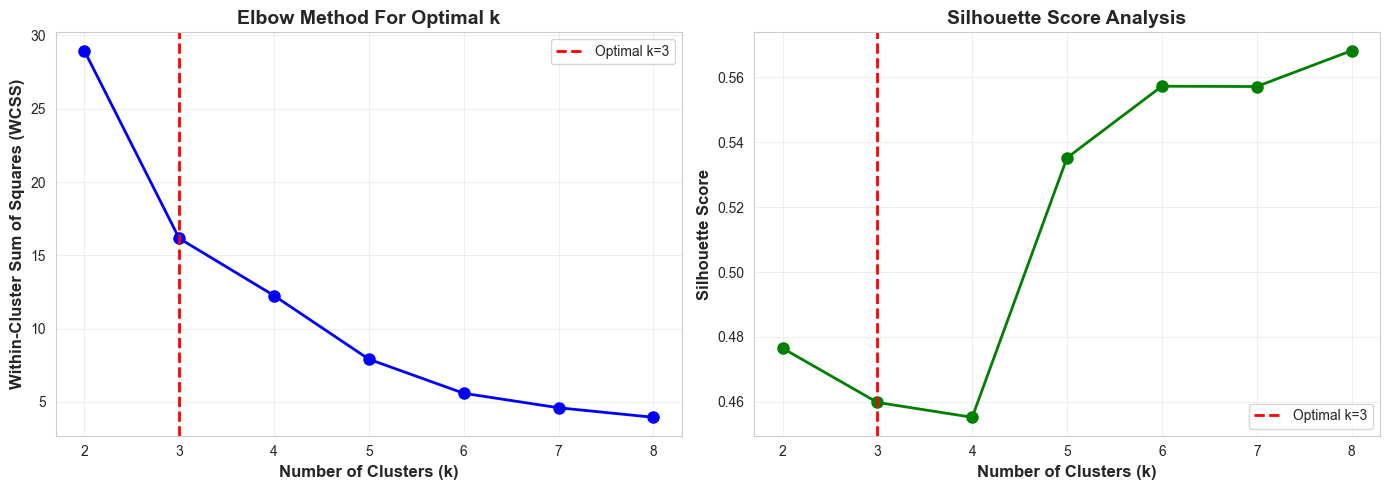

In [22]:
fig = Visualizer.plot_elbow_curve(
    list(analyzer.k_range),
    analyzer.wcss_values,
    analyzer.silhouette_scores,
    optimal_k
)
plt.show()

In [23]:
cluster_df = preprocessed_df.copy()
cluster_df['Cluster'] = best_kmeans.labels

print('\n' + '='*60)
print('CLUSTER STATISTICS')
print('='*60)

for cluster_id in range(optimal_k):
    cluster_data = cluster_df[cluster_df['Cluster'] == cluster_id]
    print(f'\nCluster {cluster_id}:')
    print(f'  Size: {len(cluster_data)} products')
    print(f'  Avg Price: ${cluster_data["price"].mean():.2f}')
    print(f'  Avg Units Sold: {cluster_data["units_sold"].mean():.0f}')
    print(f'  Avg Profit: ${cluster_data["profit"].mean():.2f}')


CLUSTER STATISTICS

Cluster 0:
  Size: 92 products
  Avg Price: $0.37
  Avg Units Sold: 0
  Avg Profit: $0.41

Cluster 1:
  Size: 41 products
  Avg Price: $0.88
  Avg Units Sold: 0
  Avg Profit: $0.27

Cluster 2:
  Size: 63 products
  Avg Price: $0.21
  Avg Units Sold: 1
  Avg Profit: $0.64


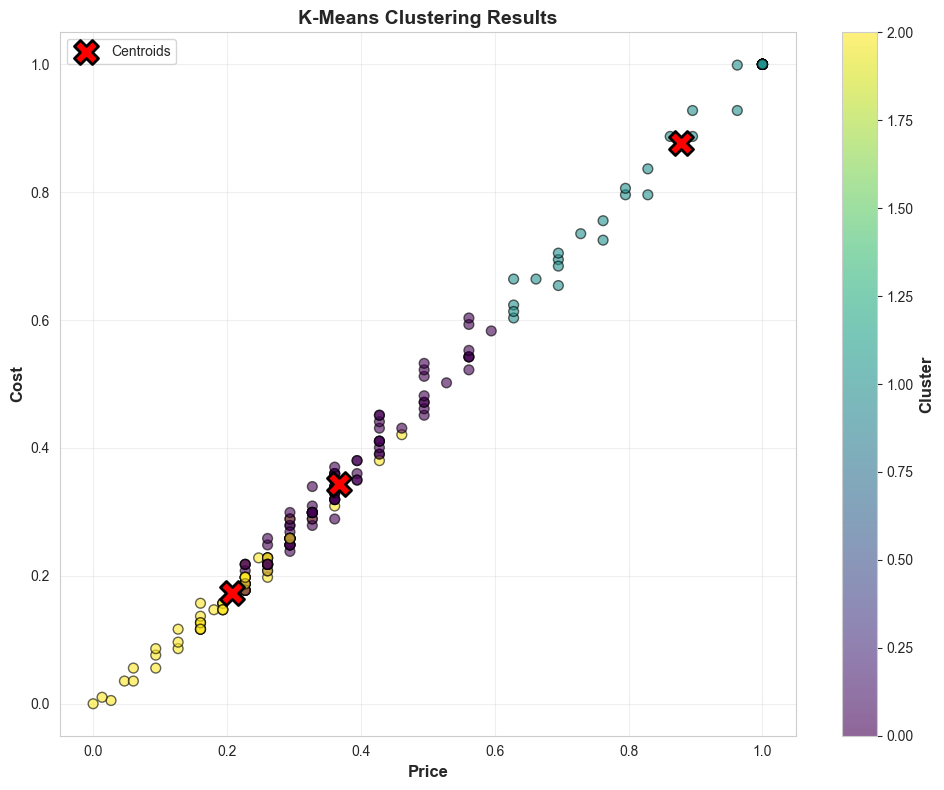

In [24]:
fig = Visualizer.plot_clusters(
    X[:, :2],
    best_kmeans.labels,
    best_kmeans.centroids[:, :2],
    ['Price', 'Cost']
)
plt.show()

## Regression Analysis

In [25]:
X_reg = preprocessed_df[['price', 'cost', 'units_sold', 'promotion_frequency']].values
y_reg = preprocessed_df['profit'].values

print(f'Regression features shape: {X_reg.shape}')
print(f'Target shape: {y_reg.shape}')

Regression features shape: (196, 4)
Target shape: (196,)


In [26]:
regressor = RegressionAnalyzer(X_reg, y_reg)
regressor.train_linear_regression()
regressor.train_polynomial_regression(degree=2)


LINEAR REGRESSION MODEL
Training on data shape: (137, 4)
Training MSE: 0.0121
Testing MSE:  0.0139
Training MAE: 0.0842
Testing MAE:  0.0820
Training R²:  0.7621
Testing R²:   0.7031
Intercept: -0.049948

POLYNOMIAL REGRESSION MODEL (Degree=2)
Training on data shape: (137, 4)
Original features: 4
Polynomial features: 14
Training MSE: 0.0007
Testing MSE:  0.0042
Training MAE: 0.0173
Testing MAE:  0.0281
Training R²:  0.9872
Testing R²:   0.9100


(LinearRegression(), PolynomialFeatures(include_bias=False))

In [27]:
best_model_name, best_metrics = regressor.get_best_model()


BEST MODEL SELECTION
Best Model: Polynomial_2
Test R² Score: 0.9100
Test MSE: 0.0042
Test MAE: 0.0281
⚠ Warning: Signs of overfitting detected!


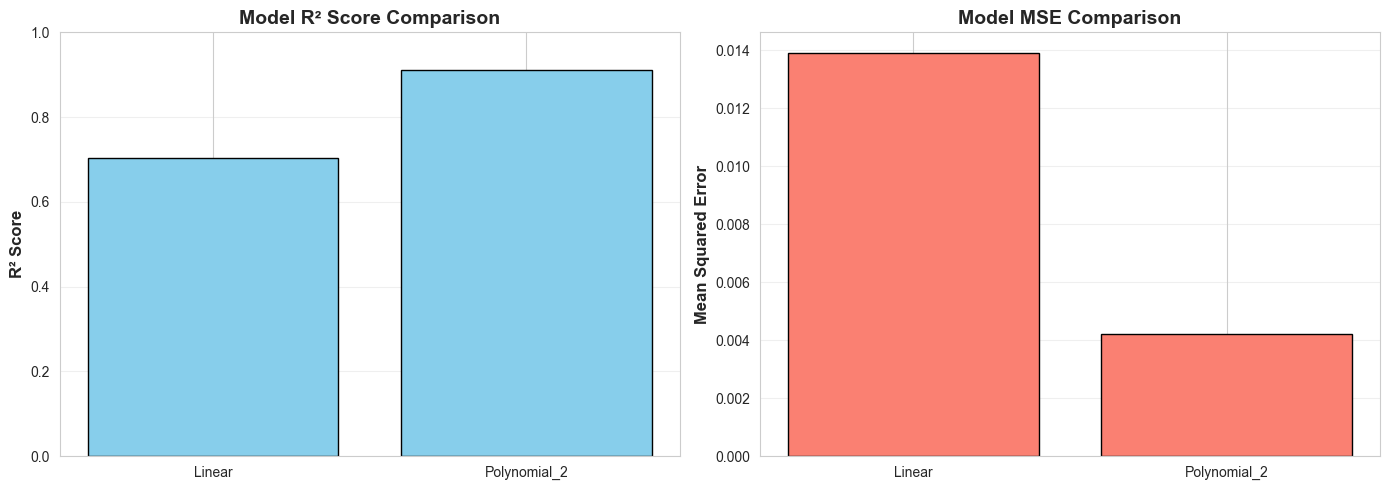

In [28]:
fig = Visualizer.plot_regression_comparison(regressor.results)
plt.show()

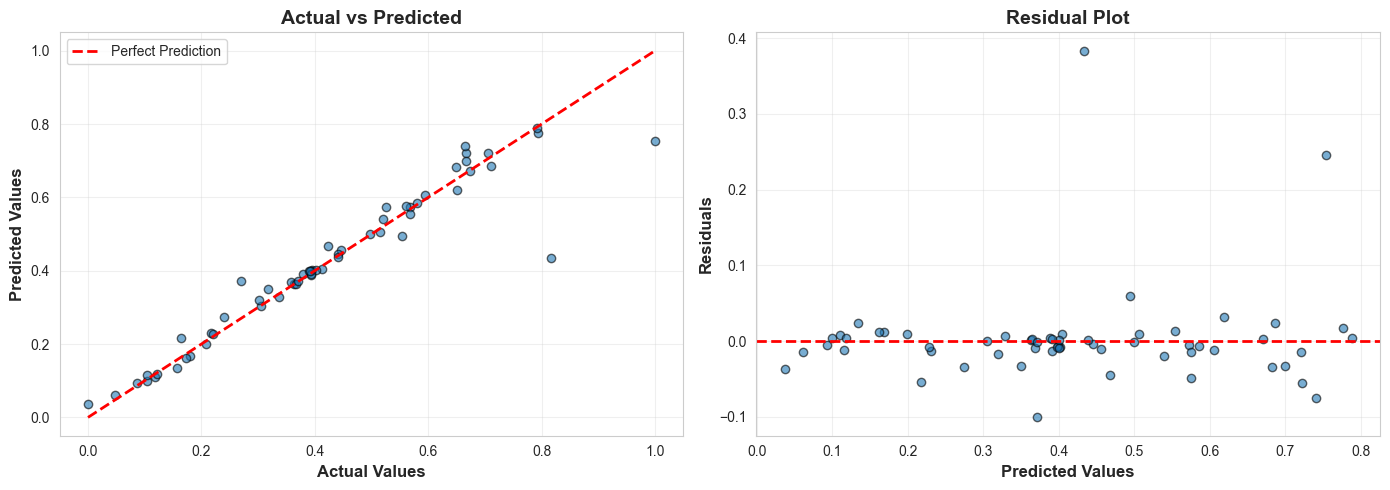

In [29]:
fig = Visualizer.plot_actual_vs_predicted(
    regressor.y_test,
    best_metrics['y_test_pred'],
    regressor.y_test - best_metrics['y_test_pred']
)
plt.show()

## Summary & Results

In [30]:
print('\n' + '='*70)
print('PROJECT COMPLETION SUMMARY')
print('='*70)

print('\n DATA PREPROCESSING')
print(f'  • Missing values handled')
print(f'  • Outliers detected and capped (IQR method)')
print(f'  • Features normalized using Min-Max scaling')
print(f'  • Final dataset shape: {preprocessed_df.shape}')

print('\n K-MEANS CLUSTERING')
print(f'  • Algorithm: K-means with K-means++ initialization')
print(f'  • Optimal k: {optimal_k}')
print(f'  • Silhouette Score: {analyzer.silhouette_scores[optimal_k-2]:.3f}')
print(f'  • {optimal_k} distinct product clusters identified')

print('\n REGRESSION ANALYSIS')
print(f'  • Linear Regression R²: {regressor.results["Linear"]["test_r2"]:.4f}')
print(f'  • Polynomial Regression R²: {regressor.results["Polynomial_2"]["test_r2"]:.4f}')
print(f'  • Best Model: {best_model_name}')
print(f'  • Best Model R²: {best_metrics["test_r2"]:.4f}')

print('\n ANALYSIS COMPLETE!')


PROJECT COMPLETION SUMMARY

 DATA PREPROCESSING
  • Missing values handled
  • Outliers detected and capped (IQR method)
  • Features normalized using Min-Max scaling
  • Final dataset shape: (196, 9)

 K-MEANS CLUSTERING
  • Algorithm: K-means with K-means++ initialization
  • Optimal k: 3
  • Silhouette Score: 0.460
  • 3 distinct product clusters identified

 REGRESSION ANALYSIS
  • Linear Regression R²: 0.7031
  • Polynomial Regression R²: 0.9100
  • Best Model: Polynomial_2
  • Best Model R²: 0.9100

 ANALYSIS COMPLETE!
